# Assignment 2

\- Si Nguyen Mai, May 19, 2018 -

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE

from nltk import ConfusionMatrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
dataset = pd.read_csv('assignment-2_dataset.csv') # Code for generating this clean dataset is in 
                                                # `Cleaning_Song-dataset.ipynb` notebook in the "root" directory
print(dataset.shape)
dataset.head()

(6000, 19)


,key,energy,liveliness,tempo,speechiness,acousticness,instrumentalness,time_signature,duration,loudness,valence,danceability,mode,time_signature_confidence,tempo_confidence,key_confidence,mode_confidence,moods,genres
0,8.0,0.831914,0.056928,106.245,0.232162,0.072076,0.000000,1.0,4.0,254.60000,-5.984,0.555338,0.837518,0.555,0.408,0.664,1.000,motivational,rap
1,1.0,0.434896,0.113409,105.276,0.071236,0.456392,0.322574,1.0,4.0,242.21333,-13.902,0.290687,0.459532,0.127,0.225,0.743,0.907,classy,jazz
2,8.0,0.326645,0.843938,123.949,0.492508,0.016599,0.000000,0.0,4.0,275.01714,-10.846,0.568852,0.934398,0.562,0.418,0.704,0.813,sexual,rap
3,7.0,0.873642,0.281888,97.940,0.041479,0.327251,0.264088,0.0,4.0,234.78857,-10.682,0.224093,0.600045,0.000,0.064,0.167,0.983,"funky,mellow",rap
4,5.0,0.117357,0.101048,129.386,0.062007,0.847661,0.010635,0.0,4.0,128.88045,-15.296,0.488700,0.778220,0.369,0.529,0.248,1.000,sprightly,jazz


In [3]:
audio_df = dataset.drop(['moods', 'genres'], axis = 1)
audio_df.head()

,key,energy,liveliness,tempo,speechiness,acousticness,instrumentalness,time_signature,duration,loudness,valence,danceability,mode,time_signature_confidence,tempo_confidence,key_confidence,mode_confidence
0,8.0,0.831914,0.056928,106.245,0.232162,0.072076,0.000000,1.0,4.0,254.60000,-5.984,0.555338,0.837518,0.555,0.408,0.664,1.000
1,1.0,0.434896,0.113409,105.276,0.071236,0.456392,0.322574,1.0,4.0,242.21333,-13.902,0.290687,0.459532,0.127,0.225,0.743,0.907
2,8.0,0.326645,0.843938,123.949,0.492508,0.016599,0.000000,0.0,4.0,275.01714,-10.846,0.568852,0.934398,0.562,0.418,0.704,0.813
3,7.0,0.873642,0.281888,97.940,0.041479,0.327251,0.264088,0.0,4.0,234.78857,-10.682,0.224093,0.600045,0.000,0.064,0.167,0.983
4,5.0,0.117357,0.101048,129.386,0.062007,0.847661,0.010635,0.0,4.0,128.88045,-15.296,0.488700,0.778220,0.369,0.529,0.248,1.000


In [4]:
genres = np.ravel(dataset['genres'])
genres

array(['rap', 'jazz', 'rap', ..., 'rock', 'jazz', 'rap'], dtype=object)

In [5]:
scaler = StandardScaler()
audio_scaled = scaler.fit_transform(audio_df)
audio_scaled

array([[ 0.74289754,  0.79038307, -0.82994424, ..., -0.22933918,
         0.57256136,  0.54444631],
       [-1.20928269, -0.79134335, -0.53280988, ..., -1.25128013,
         0.83133061,  0.07421993],
       [ 0.74289754, -1.22261716,  3.31034567, ..., -0.17349542,
         0.70358377, -0.40106266],
       ..., 
       [-1.48816558, -1.37798984, -0.56033956, ...,  0.98805495,
        -0.66232481,  0.54444631],
       [-0.37263402,  0.04421256, -0.65962109, ..., -1.30712389,
         0.76254385,  0.54444631],
       [ 0.74289754,  0.17007961,  1.7506704 , ..., -0.54764866,
        -0.37079996, -0.2999387 ]])

In [6]:
np.random.seed(777)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(audio_scaled, genres, test_size =  0.3) 

## Build original classifiers

In [28]:
original_classifiers = {'logistic regression': LogisticRegression(solver = 'saga', multi_class = 'multinomial'),
                      'svm': SVC(C = 1, gamma = 1),
                      'rfc': RandomForestClassifier(n_estimators = 5, min_samples_split = 2, max_features = 'log2')}

In [29]:
for name, classifier in original_classifiers.items():
    
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    confus_mat = ConfusionMatrix(list(y_test), list(prediction))
    class_report = classification_report(y_test, prediction)
    
    print('Original ' + name)
    print('\n')
    print(confus_mat)
    print(class_report)
    print('\n')

Original logistic regression


      |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<349> 10  67  46 |
 jazz |  15<393> 14  34 |
  rap |  65  19<328> 17 |
 rock |  38  56  23<326>|
------+-----------------+
(row = reference; col = test)

             precision    recall  f1-score   support

      dance       0.75      0.74      0.74       472
       jazz       0.82      0.86      0.84       456
        rap       0.76      0.76      0.76       429
       rock       0.77      0.74      0.75       443

avg / total       0.77      0.78      0.77      1800



Original svm


      |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<200>167  41  64 |
 jazz |   6<431>  4  15 |
  rap |  20 158<231> 20 |
 rock |  20 219  13<191>|
------+-----------------+
(row = reference; col = test

As can be seen, all the original_classifiers have the scores below 80%, with the highest performance belongs to the Logistic Regression model (77% for precision and 78% for recall). The original SVM model has very low scores with 68% for precision and 58% for recall.

## Build best classifiers by finding the best (combination of) parameters

In [30]:
param_grids = {
    'logistic regression': 
    {
        'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 
        'multi_class': ['ovr', 'multinomial']
    }, 
    'svm': 
    {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01, 0.001]
    },
    'rfc': 
    {
        'n_estimators': [5, 10, 100],
        'min_samples_split': [2, 3, 4, 5, 10],
        'max_features': ['sqrt', 'log2', 'auto']
    }
}

In [31]:
best_classifiers = {'logistic regression': {'estimator': LogisticRegression()},
                    'svm': {'estimator': SVC()},
                    'rfc': {'estimator': RandomForestClassifier()}
                   }

In [32]:
for name, param_grid in param_grids.items():
    
    estimator = best_classifiers[name]['estimator']
    
    grid = GridSearchCV(estimator, param_grid, refit = True, n_jobs = 2)
    grid.fit(X_train, y_train)
    
    best_classifiers[name]['estimator'] = grid.best_estimator_
    best_classifiers[name]['params'] = grid.best_params_
    best_classifiers[name]['prediction'] = grid.best_estimator_.predict(X_test)

My `best_classifiers` is a dict of dict storing set of data for every classifying method (logistic regression, SVM, & random forest). <br>
Each data set then includes best estimator (with best found parameters from GridSearchCV) in `estimator`, best parameters in `params`, and prediction result from best estimator in `prediction`. 

In [33]:
best_classifiers

{'logistic regression': {'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
            verbose=0, warm_start=False),
  'params': {'multi_class': 'ovr', 'solver': 'newton-cg'},
  'prediction': array(['dance', 'rap', 'jazz', ..., 'jazz', 'jazz', 'rap'], dtype=object)},
 'rfc': {'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False),
  'params': {'max_features': 'sqrt',
   'min_samples_split': 10,
   'n_estimators

In [34]:
print('Best parameters found ...\n')

for method, attribute in best_classifiers.items():
    
    print('in {} are: {}'.format(method, attribute['params']))

Best parameters found ...

in logistic regression are: {'multi_class': 'ovr', 'solver': 'newton-cg'}
in svm are: {'C': 1, 'gamma': 0.1}
in rfc are: {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}


Using the `prediction` obtained from each best estimator and real target values `y_test`, confusion matrix and classification report for every method now can be generated.

In [35]:
for name, classifier in best_classifiers.items():
    
    prediction = classifier['prediction']
    
    confus_mat = ConfusionMatrix(list(y_test), list(prediction))
    class_report = classification_report(y_test, prediction)
    
    print('Best ' + name + ' classifier with parameters: ')
    print(classifier['params'])
    print('\n')
    print(confus_mat, class_report)
    print('\n')

Best logistic regression classifier with parameters: 
{'multi_class': 'ovr', 'solver': 'newton-cg'}


      |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<340> 10  69  53 |
 jazz |  14<402>  9  31 |
  rap |  63  18<329> 19 |
 rock |  40  61  18<324>|
------+-----------------+
(row = reference; col = test)
              precision    recall  f1-score   support

      dance       0.74      0.72      0.73       472
       jazz       0.82      0.88      0.85       456
        rap       0.77      0.77      0.77       429
       rock       0.76      0.73      0.74       443

avg / total       0.77      0.78      0.77      1800



Best svm classifier with parameters: 
{'C': 1, 'gamma': 0.1}


      |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<331> 11  75  55 |
 jazz |  13<3

<br>
With best parameters found, scores of the "*best*" SVM model are higher than that of the original model by nearly 10% in precision and 20% in recall.<br>
Also, the best parameters returned for this method is C = 1 and gamma = 0.1, which means that the only difference between the best and the original model is the decrease in gamma (by 10 times) in the best estimator.

On the other hand, for other methods, all the considered parameters between the original and the best estimators are different, but little difference in prediction scores is observed.<br>
Specifically, there are little increase in scores of best random forest model, and almost no difference in those of the best logistic regression one.

## Build optimized classifiers

But first, let's have a look at the feature importances and coefficients returned by `best_classifiers['rfc']['estimator']` and `best_classifiers['logistic regression']['estimator']`, respectively.

                           importance
feature                              
acousticness                 0.177294
speechiness                  0.135340
mode                         0.134680
energy                       0.082129
tempo                        0.077228
key_confidence               0.064448
valence                      0.059708
instrumentalness             0.057244
loudness                     0.056239
danceability                 0.033583
tempo_confidence             0.027729
time_signature_confidence    0.027220
mode_confidence              0.025400
liveliness                   0.021238
key                          0.011579
time_signature               0.005719
duration                     0.003223


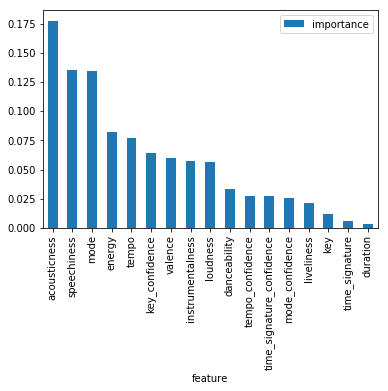

In [129]:
rfc_importances = {'feature': audio_df.columns.values,
                   'importance': best_classifiers['rfc']['estimator'].feature_importances_
                  }
rfc_importances_df = pd.DataFrame(rfc_importances)
rfc_importances_df.sort_values(by = ['importance'], ascending= False, inplace= True)
rfc_importances_df.set_index('feature', inplace = True)
print(rfc_importances_df)
rfc_importances_df.plot.bar()

In [37]:
np.mean(best_classifiers['rfc']['estimator'].feature_importances_)

0.058823529411764705

In [38]:
best_classifiers['logistic regression']['estimator'].coef_

array([[-0.05696527,  0.72148895, -0.11871585,  0.35404773, -0.39757135,
        -0.79595924,  0.46994881, -0.25206835,  0.29172998,  0.44311001,
         0.10664753, -0.41165958,  1.15408035, -0.26681219,  0.22492041,
         0.50832284, -0.10801094],
       [-0.20938273, -0.8784298 ,  0.07925582, -0.0823219 , -0.83819243,
         1.46960623,  0.19690176, -0.17440359,  0.14811786,  0.21854349,
        -0.3956161 ,  0.86955807, -0.47283915, -0.1009225 , -0.3960657 ,
        -0.38265274, -0.04658993],
       [ 0.04529943, -0.42494309,  0.09172202, -0.35788793,  1.08122035,
        -0.81640115, -0.3367475 , -0.10335043, -0.18680586, -0.15501524,
         0.48058473,  0.06163259,  0.95507851,  0.06695219, -0.11998802,
        -0.61139229,  0.35680049],
       [ 0.09731279,  0.60691347,  0.0215155 ,  0.06793878, -1.08354152,
        -0.59299192, -0.50553971,  0.4536013 , -0.04099772, -0.41453233,
        -0.23304072,  0.24233002, -1.58152688,  0.16301761,  0.24036245,
         0.15184503

In [45]:
from sklearn.base import clone

In [51]:
optimized_classifiers = {'logistic regression': {},
                         'svm': {},
                         'rfc': {},
                        }

for key, value in optimized_classifiers.items():
    
    classifier = best_classifiers[key]['estimator'] # To use SelectFromModel on the prefitted best classifier
    classifier_clone = clone(classifier) # So that in later, transformed data is fitted on the estimator with 
                                            # same parameters as the best classifier
    
    if key == 'svm':
        value['SKB'] = SelectKBest(k = 7).fit(audio_scaled, genres)
        value['SKB_features'] = audio_df.columns[value['SKB'].get_support(indices = True)].tolist()
        
        skb_X_train = X_train[:, value['SKB'].get_support()].copy()
        skb_X_test = X_test[:, value['SKB'].get_support()].copy()
        
        classifier_clone.fit(skb_X_train, y_train)
        value['SKB_prediction'] = classifier_clone.predict(skb_X_test)
    
    else:
        
        value['SFM'] = SelectFromModel(classifier, prefit = True)
        value['SFM_features'] = audio_df.columns[value['SFM'].get_support(indices = True)].tolist()
        
        sfm_X_train = value['SFM'].transform(X_train.copy())
        sfm_X_test = value['SFM'].transform(X_test.copy())
        
        classifier_clone.fit(sfm_X_train, y_train)
        value['SFM_prediction'] = classifier_clone.predict(sfm_X_test)
        
        new_clone = clone(classifier)
        value['RFE'] = RFE(new_clone, n_features_to_select = 7).fit(X_train, y_train)
        value['RFE_features'] = audio_df.columns.values[value['RFE'].support_]
        value['RFE_prediction'] = value['RFE'].predict(X_test)
                                                        

For Random Forest model, I chose the default `threshold` in `SelectFromModel` is the mean in feature importances. <br>
As from best random forest model obtained, this value is around 0.0588 and there are 7 features having importance above this, so I chose `n_features_to_select` of `RFE` to be 7 to see how things gonna be. <br>

For logistic regression model, `n_features_to_select` of `RFE` was also set to be 7. As in this case, the default `threshold` in `SelectFromModel` is the mean in `coef_`, so the number of features selected by this method might not be 7.

The `k` in `SelectKBest` was also set to be 7 for comparison.

In [47]:
from sklearn.metrics import accuracy_score

In [52]:
for key, value in optimized_classifiers.items():
    
    print('\nOptimized ' + key)
    print('\n')
    
    if key == 'svm':
        print('Features selected by SelectKBest: ', value['SKB_features'])
        print('Accuracy of optimized classifier using those features: ',
              accuracy_score(y_test, value['SKB_prediction']))
        print('\n')
    
    else:
        print('Features selected by SelectFromModel: ', value['SFM_features'])
        print("Accuracy of optimized classifier using those features: {}\n".
              format(accuracy_score(y_test, value['SFM_prediction'])))
        
        print('Features selected by RFE: ', value['RFE_features'])
        print('Accuracy of optimized classifier using those features: ', 
              accuracy_score(y_test, value['RFE_prediction']))
        print('\n')
    


Optimized logistic regression


Features selected by SelectFromModel:  ['energy', 'speechiness', 'acousticness', 'danceability', 'mode', 'key_confidence']
Accuracy of optimized classifier using those features: 0.7466666666666667

Features selected by RFE:  ['energy' 'speechiness' 'acousticness' 'instrumentalness' 'danceability'
 'mode' 'key_confidence']
Accuracy of optimized classifier using those features:  0.757222222222



Optimized svm


Features selected by SelectKBest:  ['energy', 'speechiness', 'acousticness', 'valence', 'mode', 'key_confidence', 'mode_confidence']
Accuracy of optimized classifier using those features:  0.747222222222



Optimized rfc


Features selected by SelectFromModel:  ['energy', 'tempo', 'speechiness', 'acousticness', 'valence', 'mode', 'key_confidence']
Accuracy of optimized classifier using those features: 0.7661111111111111

Features selected by RFE:  ['energy' 'tempo' 'speechiness' 'acousticness' 'instrumentalness' 'mode'
 'key_confidence']
Accuracy 

As I expected, the number of features above the `mean` in `coef_` from logistic regression model (which is 6) is not as same as (less than) the number of features above the `mean` in `feature_importance`. <br>
As a result, in logistic regression model, `RFE` returned more features than `SelectFromModel`. With more features, `RFE` gave higher accuracy score.

In random forest model, `SelectFromModel` and `RFE` obviously returned the same number of features. Also, as I used the prefitted `best_classifier` for `SelectFromModel`, the set of features selected by this method is as predicted from the `rfc_importances_df` above. <br> 
However, using `RFE`, `instrumentalness` was selected instead of `valence`, and accuracy score is little higher than that from `SelectFromModel`. This reflects the variation in `feature_importance` resulting from recursively fitting and ranking the features. This variation, however, was very little. Looking back at the `rfc_importances_df`, we can also see that the `feature_importance` of `instrumentalness` and `valence` were initally very close to each other. <br>

For all the model, with same parameters as `best_classifier` but reduced number of features, `optimized_classifier` gave lower scores.

Let's have a closer look to the confusion matrix and classification report of these `optimized_classifiers`.

In [54]:
for key, value in optimized_classifiers.items():
    
    print('\nOptimized ' + key)
    print('\n')
    
    if key == 'svm':
        print('Confusion Matrix: \n', ConfusionMatrix(list(y_test), list(value['SKB_prediction'])))
        print('Classification Report: \n', classification_report(y_test, value['SKB_prediction']))
        print('\n')
    
    else:
        print('Confusion Matrix (SelectFromModel): \n', ConfusionMatrix(list(y_test), list(value['SFM_prediction'])))
        print('Classification Report (SelectFromModel): \n', classification_report(y_test, value['SFM_prediction']))
        
        print('Confusion Matrix (RFE): \n', ConfusionMatrix(list(y_test), list(value['RFE_prediction'])))
        print('Classification Report (RFE): \n', classification_report(y_test, value['RFE_prediction']))
        print('\n')


Optimized logistic regression


Confusion Matrix (SelectFromModel): 
       |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<334> 12  66  60 |
 jazz |  10<394> 12  40 |
  rap |  70  23<313> 23 |
 rock |  51  74  15<303>|
------+-----------------+
(row = reference; col = test)

Classification Report (SelectFromModel): 
              precision    recall  f1-score   support

      dance       0.72      0.71      0.71       472
       jazz       0.78      0.86      0.82       456
        rap       0.77      0.73      0.75       429
       rock       0.71      0.68      0.70       443

avg / total       0.75      0.75      0.75      1800

Confusion Matrix (RFE): 
       |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<336> 13  67  56 |
 jazz |  14<397>  9  36 |
  rap |  56  2

## Vary the parameters of feature selection methods

In [62]:
from sklearn.pipeline import Pipeline

In [150]:
fs_pipes = {
    'logistic regression': [],
    'svm': [],
    'rfc': []
}

for method, attribute in best_classifiers.items():
    
    estimator = attribute['estimator']
    clone_estimator = clone(estimator)
    
    if method == 'svm':
        
        pipeline = Pipeline([('fs', SelectKBest()), ('clf', clone_estimator)])
        param_grid = {
            'fs__k': [5, 6, 7, 8, 9]
        }
        fs_pipes[method] = [(pipeline, param_grid)]
        
    else:
        
        pipeline_1 = Pipeline([('fs', SelectFromModel(estimator)), ('clf', clone_estimator)])
        
        if method == 'logistic regression': 
            thresholds = [-0.5, -0.02, 0.03, 0.15, 0.5]
        else:
            thresholds = [0.01, 0.03, 0.06, 0.1]
        param_grid_1 = {
                'fs__threshold': thresholds
        }
        
        pipeline_2 = Pipeline([('fs', RFE(clone_estimator)), ('clf', clone_estimator)])
        param_grid_2 = {
            'fs__n_features_to_select': [5, 7, 9, 11, 13]
        }
        fs_pipes[method] = [ (pipeline_1, param_grid_1), (pipeline_2, param_grid_2) ] 

In [152]:
for pipe, grid in fs_pipes['rfc']:
    
    print(pipe)
    print('\n')
    print(grid)
    print("\n")

Pipeline(memory=None,
     steps=[('fs', SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


{'fs__threshold': [0.01, 0.03, 0.06, 0.1]}


Pipeline(memory=None,
     steps=[('fs', RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


{'fs__n_features_to_select': [5, 7, 9, 11, 13]}




In [154]:
def pipe_optimizing (pipes_dict, X_train, X_test, y_train, n_jobs):

    optimal_estimators = {}
    
    for method, attribute in pipes_dict.items():
        
        optimal_estimators[method] = {
            'pipelines': attribute,
            'optimal_pipes': []
        }

        for pipe, grid in attribute:

            grid_pipe = GridSearchCV(pipe, grid, n_jobs = n_jobs, return_train_score=False)
            grid_pipe.fit(X_train, y_train)
            prediction = grid_pipe.predict(X_test)

            optimal_estimators[method]['optimal_pipes'].append({
                'estimator': grid_pipe.best_estimator_,
                'params': grid_pipe.best_params_,
                'prediction': prediction,
                'cv_results': grid_pipe.cv_results_ 
            })

    return optimal_estimators

def evaluate_optimal_pipe (optimized_pipes, evaluation, y_test):
    
    for method, attribute in optimized_pipes.items():
    
        print(method)
        print("\n")
    
        for optimal_pipe in attribute['optimal_pipes']:

            print(optimal_pipe['params'])
            report = evaluation(y_test, optimal_pipe['prediction'])
            print(report)
            print("\n")

In [124]:
optimized_fs_pipes = pipe_optimizing(fs_pipes, X_train, X_test, y_train, n_jobs = 2)

In [142]:
evaluate_optimal_pipe(optimized_fs_pipes, classification_report, y_test)

logistic regression


{'fs__threshold': -0.5}
             precision    recall  f1-score   support

      dance       0.72      0.70      0.71       450
       jazz       0.80      0.87      0.84       436
        rap       0.77      0.77      0.77       439
       rock       0.76      0.72      0.74       475

avg / total       0.76      0.76      0.76      1800



{'fs__n_features_to_select': 13}
             precision    recall  f1-score   support

      dance       0.72      0.70      0.71       450
       jazz       0.80      0.87      0.83       436
        rap       0.77      0.77      0.77       439
       rock       0.76      0.71      0.73       475

avg / total       0.76      0.76      0.76      1800



svm


{'fs__k': 9}
             precision    recall  f1-score   support

      dance       0.73      0.69      0.71       450
       jazz       0.76      0.89      0.82       436
        rap       0.78      0.80      0.79       439
       rock       0.74      0.64      0.69 

In [130]:
new_fs_pipes = {
    'logistic regression': [],
    'svm': [],
    'rfc': []
}

for method, attribute in best_classifiers.items():
    
    estimator = attribute['estimator']
    clone_estimator = clone(estimator)
    
    if method == 'svm':
        
        pipeline = Pipeline([('fs', SelectKBest()), ('clf', clone_estimator)])
        param_grid = {
            'fs__k': [6, 9, 10, 13] # Added 5 & 10
        }
        fs_pipes[method] = [(pipeline, param_grid)]
        
    else:
        
        pipeline_1 = Pipeline([('fs', SelectFromModel(estimator)), ('clf', clone_estimator)])
        
        if method == 'logistic regression': 
            thresholds = [-1, -0.7, -0.5, 0.15, 0.5] # Added -1 & -0.7
        else:
            thresholds = [0.005, 0.01, 0.03, 0.06] # Added 0.005
        param_grid_1 = {
                'fs__threshold': thresholds
        }
        
        pipeline_2 = Pipeline([('fs', RFE(clone_estimator)), ('clf', clone_estimator)])
        param_grid_2 = {
            'fs__n_features_to_select': [9, 13, 15] # Kept 9, 13. Added 15
        }
        fs_pipes[method] = [ (pipeline_1, param_grid_1), (pipeline_2, param_grid_2) ] 

In [131]:
new_optimized_fs_pipes = pipe_optimizing(fs_pipes, X_train, X_test, y_train, n_jobs = 2)

In [143]:
evaluate_optimal_pipe(new_optimized_fs_pipes, classification_report, y_test)

logistic regression


{'fs__threshold': -1}
             precision    recall  f1-score   support

      dance       0.72      0.70      0.71       450
       jazz       0.80      0.87      0.84       436
        rap       0.77      0.77      0.77       439
       rock       0.76      0.72      0.74       475

avg / total       0.76      0.76      0.76      1800



{'fs__n_features_to_select': 15}
             precision    recall  f1-score   support

      dance       0.72      0.69      0.70       450
       jazz       0.80      0.87      0.83       436
        rap       0.77      0.77      0.77       439
       rock       0.76      0.72      0.74       475

avg / total       0.76      0.76      0.76      1800



svm


{'fs__k': 13}
             precision    recall  f1-score   support

      dance       0.75      0.70      0.72       450
       jazz       0.81      0.89      0.85       436
        rap       0.78      0.77      0.78       439
       rock       0.74      0.73      0.73  

Using the best number of features or threshold selected from `GridSearchCV` did not improve the scores.

I think this possibly because that there might be cases where a parameter performs best in the "grid search" but fails in the whole dataset. <br>
In fact, in the `GridSearchCV`, the test score of every parameter (used for ranking them) is from a k-fold (the default is 3-fold) cross-validation, which is performed on only 30% of our data (training data), and therefore, is very different from a cross-validation on the whole dataset.

Overall, I think in this case, the original number of audio features already gave the best prediction models (with optimized model parameters) so that reducing it declined the prediction performance.

## Combine both parameter selection and feature selection

In [155]:
svm_pipe_param_grid = {
        'fs__k': [7, 9, 13, 15],
        'clf__C': [0.1, 1, 10],
        'clf__gamma': [1, 0.1, 0.01, 0.001]
    }

svm_pipe = {
    'svm': [ (Pipeline([('fs', SelectKBest()), ('clf', SVC())]), svm_pipe_param_grid) ] 
}


In [156]:
optimal_svm = pipe_optimizing(svm_pipe, X_train, X_test, y_train, n_jobs = 2)

In [157]:
evaluate_optimal_pipe(optimal_svm, classification_report, y_test)

svm


{'clf__C': 1, 'clf__gamma': 0.1, 'fs__k': 15}
             precision    recall  f1-score   support

      dance       0.76      0.70      0.73       450
       jazz       0.81      0.88      0.84       436
        rap       0.79      0.77      0.78       439
       rock       0.72      0.73      0.73       475

avg / total       0.77      0.77      0.77      1800





**No result was returned for below steps, as the computation would take a huge amount of time on my laptop. <br>
However, the code is still here, because I think it deserves that.**

In [149]:
multiple_param_grids = {
    'logistic_regression': {
        'fs__threshold': [-1, -0.7, -0.5],
        'fs__estimator__solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 
        'fs__estimator__multi_class': ['ovr', 'multinomial'],

        'clf__solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 
        'clf__multi_class': ['ovr', 'multinomial']
    },
    
    'rfc': {
        'fs': [SelectFromModel(RandomForestClassifier())],
        'fs__threshold': [0.005, 0.01, 0.06],
        'fs__estimator__n_estimators': [5, 10, 100],
        'fs__estimator__min_samples_split': [2, 3, 4, 5, 10],
        'fs__estimator__max_features': ['sqrt', 'log2', 'auto'],

        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [5, 10, 100],
        'clf__min_samples_split': [2, 3, 4, 5, 10],
        'clf__max_features': ['sqrt', 'log2', 'auto']
    }
}

logreg_rfc_pipes = {
    'logistic regression': [(
        Pipeline([('fs', SelectFromModel(LogisticRegression())), ('clf', LogisticRegression())]),
        multiple_param_grids['logistic regression']
    )],
    
    'rfc': [(
        Pipeline([('fs', SelectFromModel(RandomForestClassifier())), ('clf', RandomForestClassifier())]),
        multiple_param_grids['rfc']
    )]
}

In [ ]:
optimal_logreg_rfc = pipe_optimizing(logreg_rfc_pipes, X_train, X_test, y_train, n_jobs = 2)

## Audio features and moods

** ... To be completed ... **

## The effect of scaling data

In [56]:
X_train_nonscaled, X_test_nonscaled, \
y_train_nonscaled, y_test_nonscaled = train_test_split(audio_df, dataset['genres'], test_size =  0.3)

In [61]:
best_classifiers_nonscaled = {'logistic regression': {'estimator': LogisticRegression()},
                    'svm': {'estimator': SVC()},
                    'rfc': {'estimator': RandomForestClassifier()}
                   }

for name, param_grid in param_grids.items():
    
    estimator = best_classifiers_nonscaled[name]['estimator']
    
    grid = GridSearchCV(estimator, param_grid, refit = True, n_jobs = 2)
    grid.fit(X_train_nonscaled, y_train_nonscaled)
    
    best_classifiers_nonscaled[name]['estimator'] = grid.best_estimator_
    best_classifiers_nonscaled[name]['params'] = grid.best_params_
    best_classifiers_nonscaled[name]['prediction'] = grid.best_estimator_.predict(X_test_nonscaled)
    
for name, classifier in best_classifiers_nonscaled.items():
    
    prediction = classifier['prediction']
    
    confus_mat = ConfusionMatrix(list(y_test_nonscaled), list(prediction))
    class_report = classification_report(y_test_nonscaled, prediction)
    
    print('Best ' + name + ' classifier with parameters: ')
    print(classifier['params'])
    print('\n')
    print(confus_mat, class_report)
    print('\n')

/home/singuyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/singuyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/singuyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/singuyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/singuyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Best logistic regression classifier with parameters: 
{'multi_class': 'ovr', 'solver': 'newton-cg'}


      |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<319>  9  68  55 |
 jazz |  12<386> 12  40 |
  rap |  65  19<333> 21 |
 rock |  46  67  17<331>|
------+-----------------+
(row = reference; col = test)
              precision    recall  f1-score   support

      dance       0.72      0.71      0.71       451
       jazz       0.80      0.86      0.83       450
        rap       0.77      0.76      0.77       438
       rock       0.74      0.72      0.73       461

avg / total       0.76      0.76      0.76      1800



Best svm classifier with parameters: 
{'C': 10, 'gamma': 0.001}


      |   d             |
      |   a   j       r |
      |   n   a   r   o |
      |   c   z   a   c |
      |   e   z   p   k |
------+-----------------+
dance |<336> 24  40  51 |
 jazz |  5

For SVM, without scaling the data of many features to be in the same scale, the prediction scores drop significantly (even with best parameters). This is obvious since SVM requires data of all features to be in the same scale. 

For linear logistic regression, `ConvergenceWarning` was raised by `sag` solver (sag.py) of `linear_model`. <br>
I tried increasing the `max_iter` (up to 4000) as suggested, but the problem still wasn't fixed. <br>
I think this is because of the non-scaled data itself. In the documentation of Scikit-learn, they also stated that:

> Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale.

[Suggestion on solving the problem](https://stats.stackexchange.com/questions/184017/how-to-fix-non-convergence-in-logisticregressioncv) <br>
[Assumptions of linear regression](http://people.duke.edu/~rnau/testing.htm) <br>
[Distribution of independent variables in regression models](https://www.theanalysisfactor.com/the-distribution-of-independent-variables-in-regression-models/) <br>